# TED TALK

### Import lib 

In [120]:
#Import necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import ast


### Import data

In [66]:
sal = pd.read_csv("ted.csv")

In [67]:
#Print 5 row of dataframe
sal.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [68]:
#Print out brief info
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 239.1+ KB


In [69]:
#Decribe the data
sal.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


handling the data

In [70]:
#Check number null
sal.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

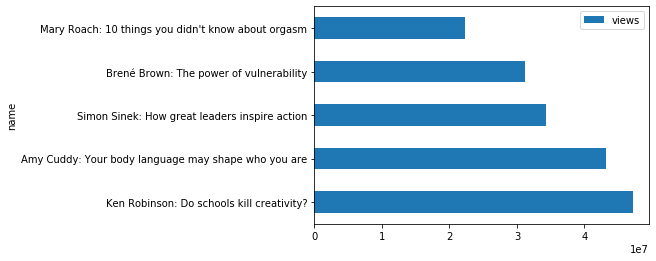

In [71]:
#Get top 5 most views and visualize 
sortTop5 = sal.sort_values('views', ascending= False).head(5)
sortTop5.plot(kind='barh',x="name",y="views")

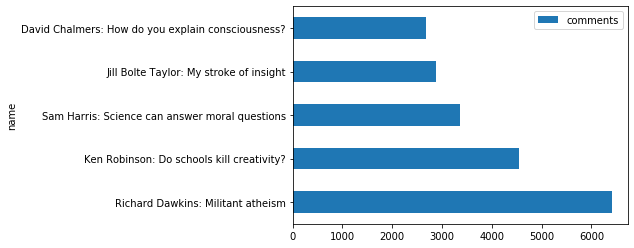

In [72]:
#Get top 5 most comment and visualize 
sortTop5 = sal.sort_values('comments', ascending= False).head(5)
sortTop5.plot(kind='barh',x="name",y="comments")

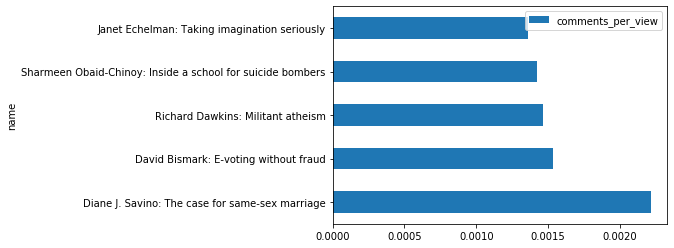

In [73]:
#create comments per view
# creating a new column 'comments_per_view'
sal['comments_per_view'] = sal.comments / sal.views
salSort= sal.sort_values('comments_per_view',ascending= False).head(5)
salSort.plot(kind='barh',x="name",y="comments_per_view")

## Show the number of talks took place each year

In [74]:
#Get date of number of talks
sal['film_datetime'] = pd.to_datetime(sal.film_date, unit='s')
sal[['event', 'film_datetime']].sample(5)

,event,film_datetime
1375,TEDxWinnipeg,2012-09-13
396,TED2009,2009-02-06
2243,TEDxMidAtlantic,2015-09-25
1840,TEDMED 2014,2014-09-18
1936,TEDxPlaceDesNations,2014-12-11


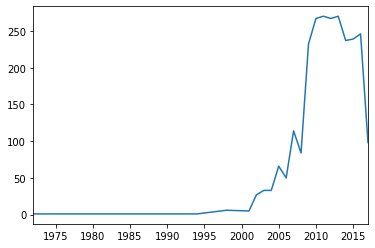

In [75]:
#Count the talks in every years
getYear=sal.film_datetime.dt.year.value_counts().sort_index().plot()
getYear

### Handle with events 

In [76]:
# Count the most talks in events
sal.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

### Occupation of presentator

In [77]:
sal.speaker_occupation.value_counts().head()

Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Name: speaker_occupation, dtype: int64

### Analyze Ratings

In [82]:
#Split all genre in Rating
rating_names = set()
for index, row in sal.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])
    
print (rating_names)

{'Persuasive', 'Longwinded', 'Informative', 'Ingenious', 'OK', 'Confusing', 'Inspiring', 'Jaw-dropping', 'Beautiful', 'Obnoxious', 'Unconvincing', 'Courageous', 'Funny', 'Fascinating'}


In [90]:
#Count Vote in one by one Genre after split
rating_data = defaultdict(list)
for index, row in sal.iterrows():
    rating = ast.literal_eval(row['ratings'])
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head(10)

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
5,1102,706,397,721,285,301,1038,1350,377,2423,669,441,335,5211
6,2484,277,320,477,193,72,226,316,225,311,61,308,290,438
7,9,98,195,34,26,25,121,153,26,37,57,63,5,175
8,60,145,211,562,177,70,623,313,283,764,60,154,83,441
9,26,767,116,476,306,111,304,459,838,1543,209,245,371,2556


### Get Talks Ratings

In [91]:
#Count vode in Genres of Ted
count_talks = defaultdict(list)
for rating in rating_data.columns:
    if (rating != 'Talk_ID') & (rating != 'total'):
        count_talks['rating'].append(rating) 
        count_talks['count'].append(rating_data[rating_data[rating] >0][rating].count())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

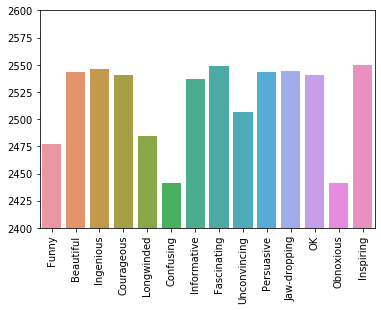

In [92]:
sns.barplot(x="rating", y="count", data=count_talks)
plt.ylim(2400, 2600)
plt.xticks(rotation='vertical')

### Handle with Tag

416


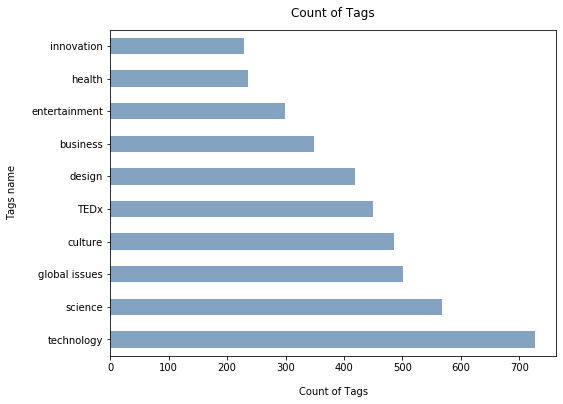

In [117]:
#Split all genre in Rating
tags_data = defaultdict(list)
for index, row in sal.iterrows():
    themes = ast.literal_eval(row['tags'])
    for item in themes:
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

print (len(tags_data['tags'].unique()))
#Print top Tags
tags_data.tags.value_counts().head(10).plot(kind='barh', figsize=(8, 6),color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Count of Tags", labelpad=14)
plt.ylabel("Tags name", labelpad=14)
plt.title("Count of Tags", y=1.02);